# Selenium으로 무적 크롤러 만들기

## Selenium이란?
Selenium은 주로 웹앱을 테스트하는데 이용하는 프레임워크다. webdriver라는 API를 통해 운영체제에 설치된 Chrome등의 브라우저를 제어하게 된다.

브라우저를 직접 동작시킨다는 것은 JavaScript를 이용해 비동기적으로 혹은 뒤늦게 불러와지는 컨텐츠들을 가져올 수 있다는 것이다. 즉, '눈에 보이는' 컨텐츠라면 모두 가져올 수 있다는 뜻이다. 우리가 requests에서 사용했던 .text의 경우 브라우저에서 '소스보기'를 한 것과 같이 동작하여, JS등을 통해 동적으로 DOM이 변화한 이후의 HTML을 보여주지 않는다. 반면 Selenium은 실제 웹 브라우저가 동작하기 때문에 JS로 렌더링이 완료된 후의 DOM결과물에 접근이 가능하다.

## 어떻게 설치하나?

### pip selenium package
Selenium을 설치하는 것은 기본적으로 pip를 이용한다.

In [1]:
pip install selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install bs4

>참고: Selenium의 버전은 자주 업데이트 되고, 브라우저의 업데이트 마다 새로운 Driver를 잡아주기 때문에 항상 최신버전을 깔아 주는 것이 좋다.

이번 튜토리얼에서는 BeautifulSoup이 설치되어있다고 가정합니다.

> BeautifulSoup은 pip install bs4로 설치 가능합니다.

## webdriver
Selenium은 webdriver라는 것을 통해 디바이스에 설치된 브라우저들을 제어할 수 있다. 이번 가이드에서는 Chrome을 사용해 볼 예정이다.

### Chrome WebDriver
크롬을 사용하려면 로컬에 크롬이 설치되어있어야 한다.

그리고 크롬 드라이버를 다운로드 받아주자.

https://sites.google.com/a/chromium.org/chromedriver/downloads

글 작성일자인 2월 27일에는 ChromeDrive 2.27버전이 최신이며, 크롬 v54~56을 지원한다.
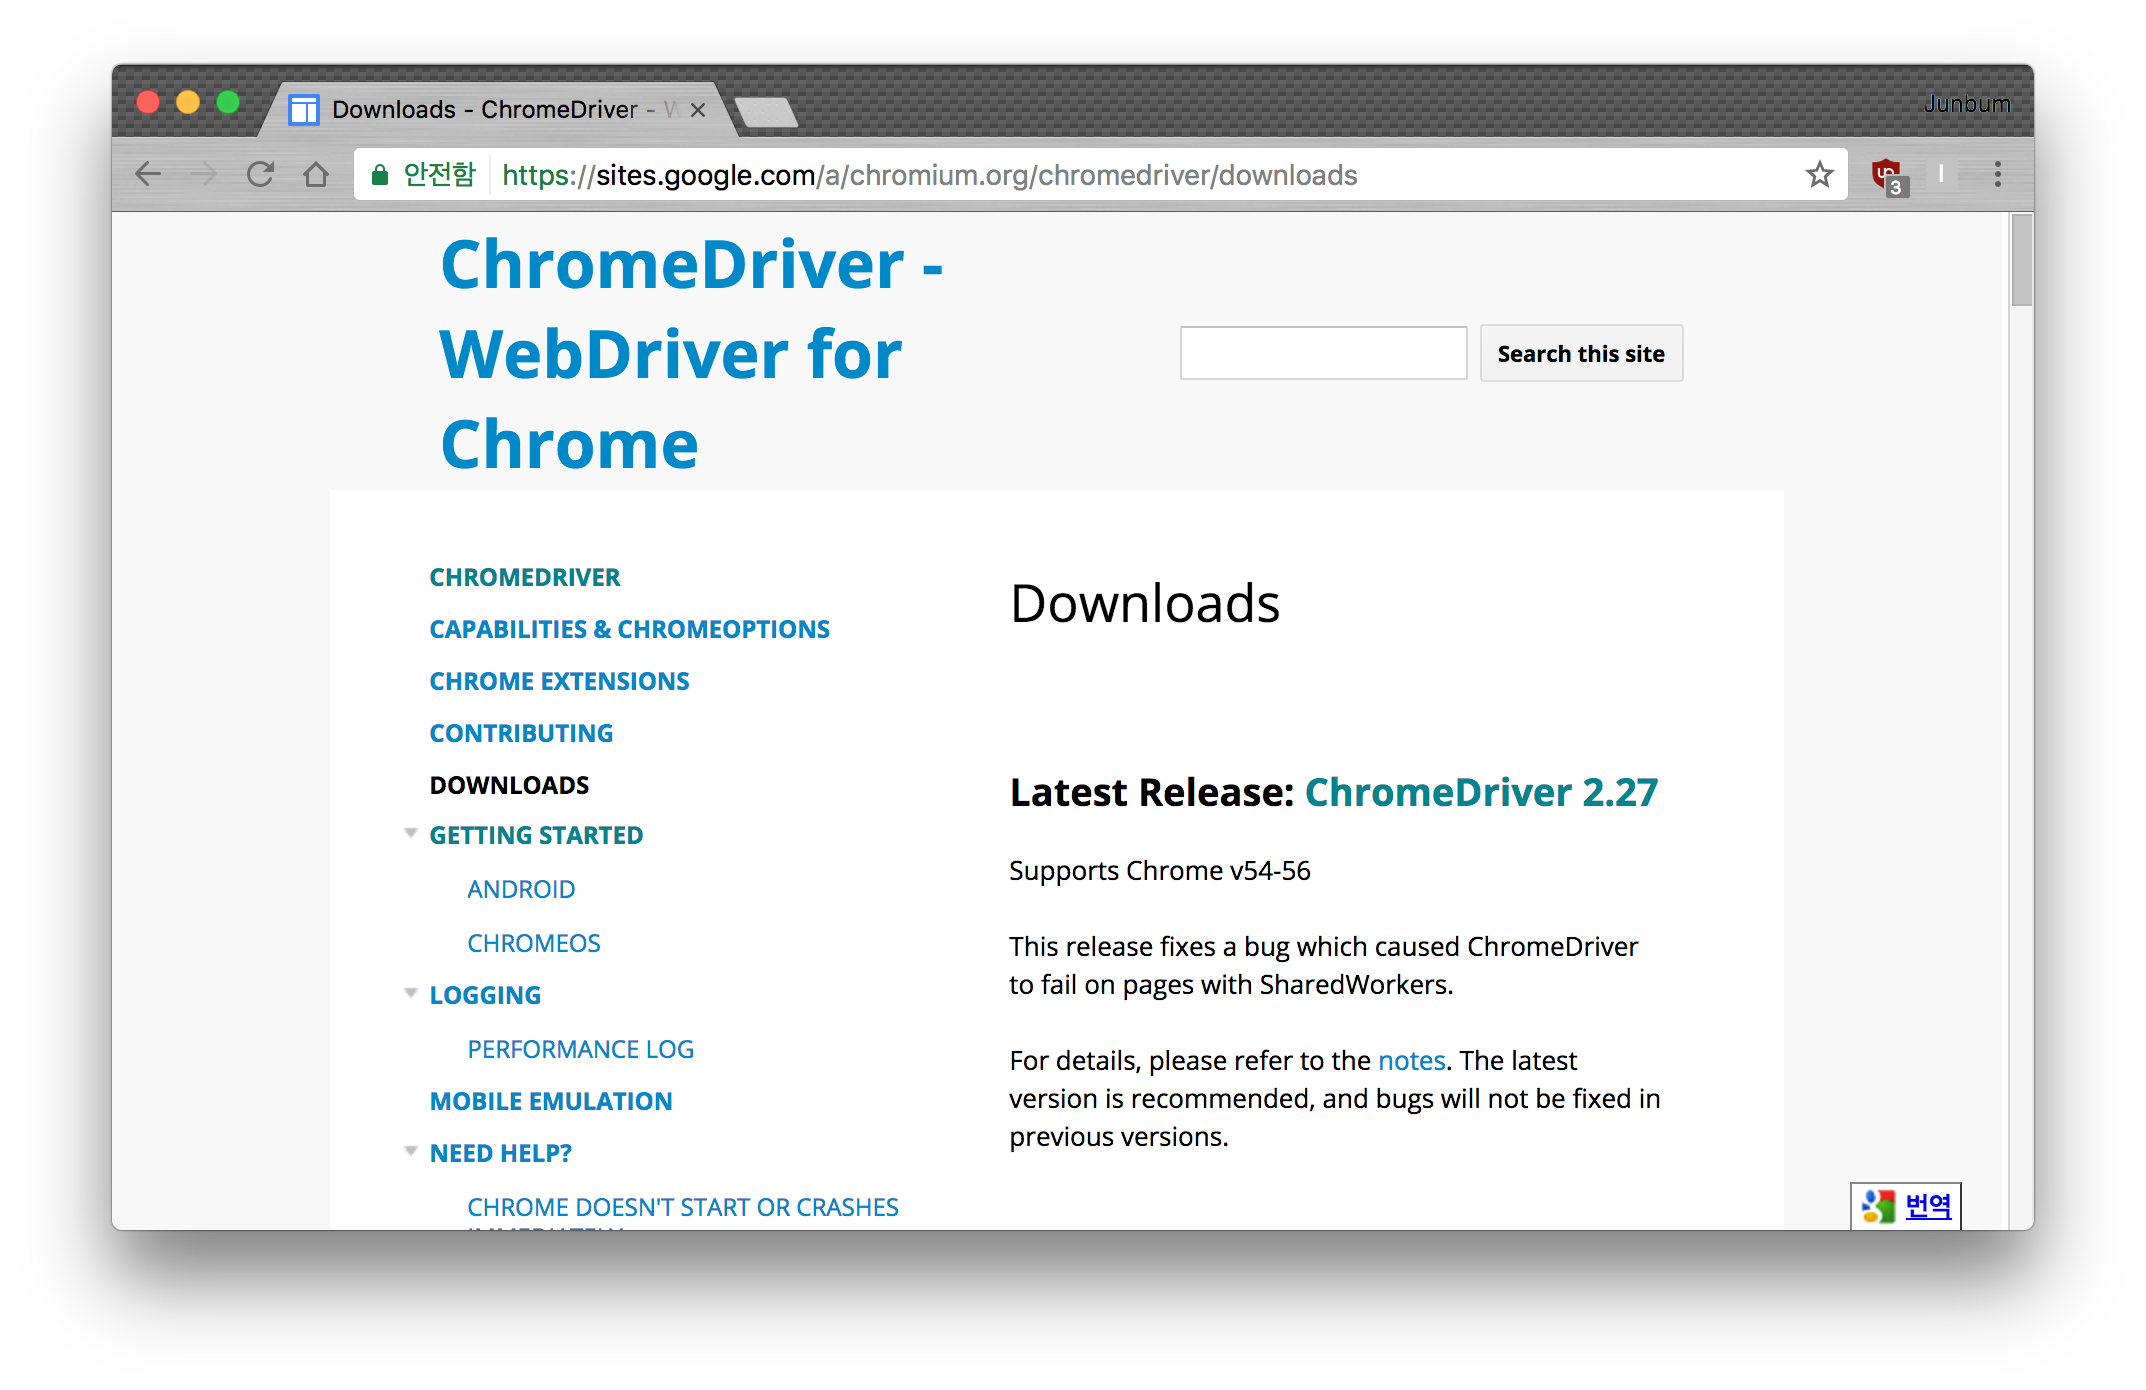

버전을 클릭하면 아래와 같은 OS별 Driver파일이 나열되어있다. 사용하는 OS에 따른 driver를 받아주자.
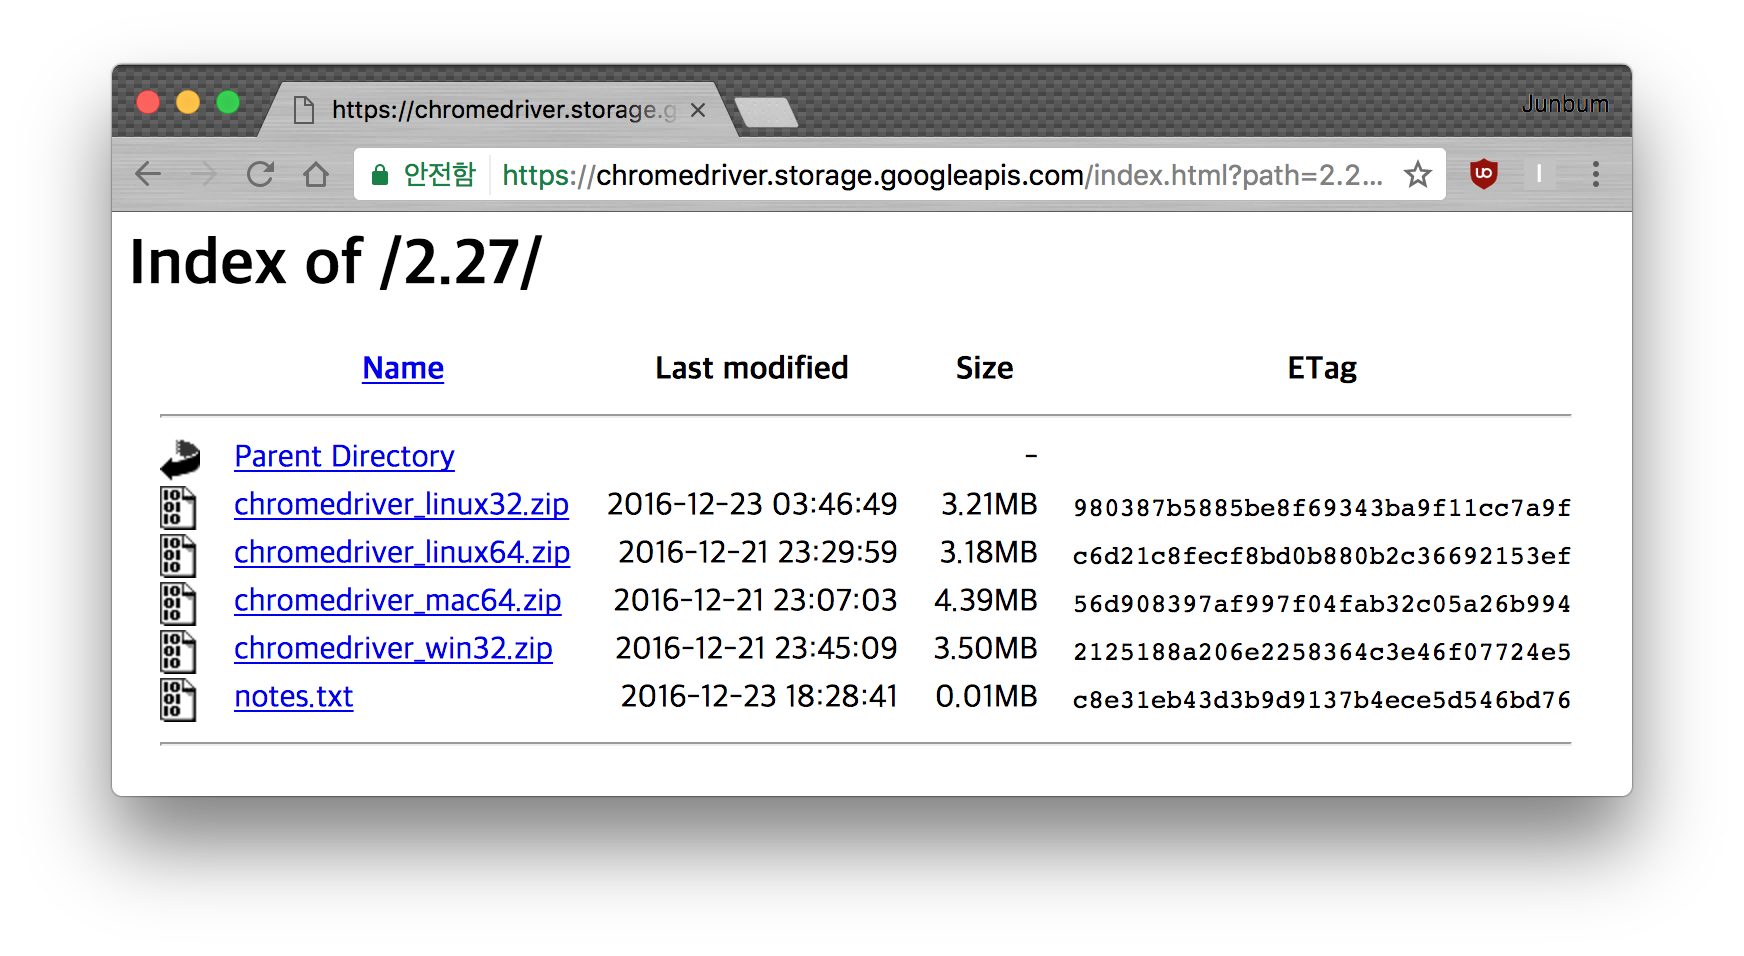


zip파일을 받고 풀어주면 chromedriver라는 파일이 저장된다.

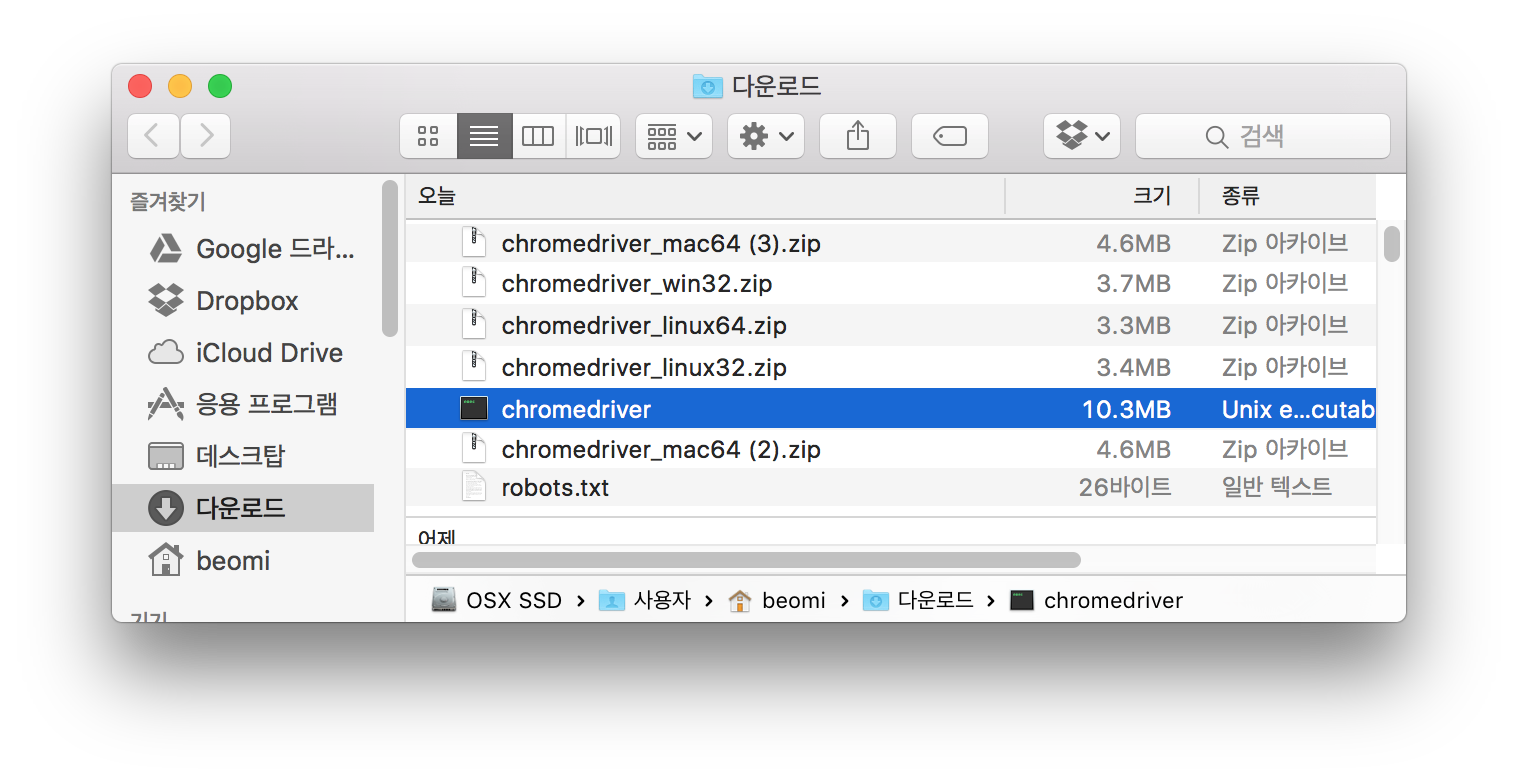

위 폴더를 기준으로 할 경우 /Users/beomi/Downloads/chromedriver가 크롬드라이버의 위치다.

이 경로를 나중에 Selenium 객체를 생성할 때 지정해 주어야 한다.

### PhantomJS webdriver
PhantomJS는 기본적으로 WebTesting을 위해 나온 Headless Browser다.(즉, 화면이 존재하지 않는다)

하지만 JS등의 처리를 온전하게 해주며 CLI환경에서도 사용이 가능하기 때문에, 만약 CLI서버 환경에서 돌아가는 크롤러라면 PhantomJS를 사용하는 것도 방법이다.

PhantomJS는 PhantomJS Download Page에서 받을 수 있다.

Binary 자체로 제공되기 때문에, Linux를 제외한 OS에서는 외부 dependency없이 바로 실행할 수 있다.
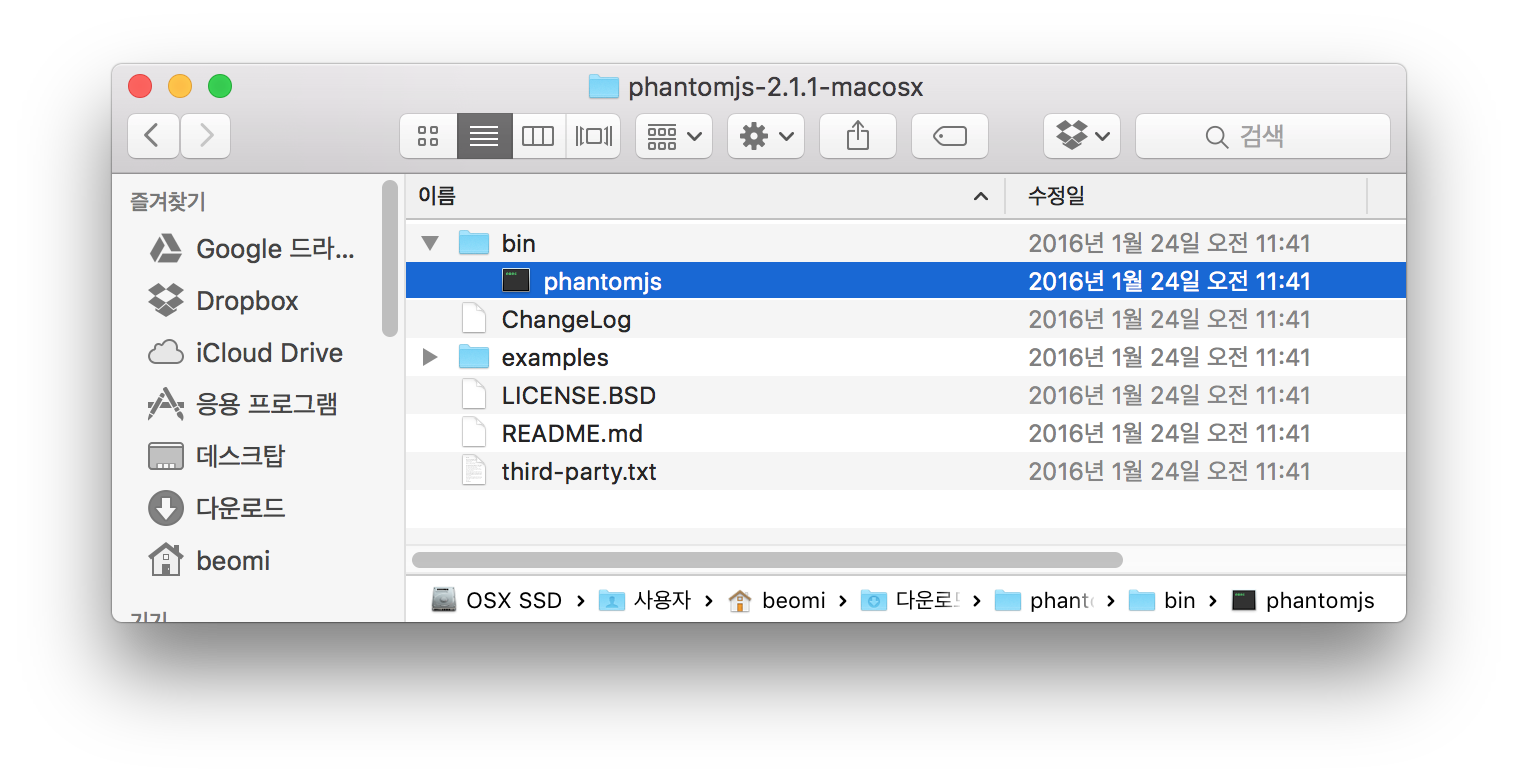

압축을 풀어주면 아래와 같은 많은 파일들이 있지만, 우리가 사용하는 것은 bin폴더 안의 phantomjs파일이다.

위 폴더 기준으로 할 경우 /Users/beomi/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs가 PhantomJS드라이버의 위치다.

## Selenium으로 사이트 브라우징
Selenium은 webdriver api를 통해 브라우저를 제어한다.

우선 webdriver를 import해주자.

In [3]:
from selenium import webdriver

이제 driver라는 이름의 webdriver 객체를 만들어 주자.

> 이름이 꼭 driver일 필요는 없으며, 이번 가이드에서는 크롬을 기본적으로 이용할 예정이다.

In [17]:
from selenium import webdriver

## Chrome의 경우 아까 받은 chromedriver의 위치를 지정해준다. 
driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')

## PhantomJS의 경우 아까 반은 PhantomJS의 위치를 지정해준다. 
driver = webdriver.PhantomJS('c:/Users/82106/Downloads/phantomjs_2.1.1_windows/bin/phantomjs.exe')

In [18]:
from selenium import webdriver

driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')
## 암묵적으로 웹 자원 로드를 위해 3초까지 기다려 준다. 
driver.implicitly_wait(3)

이제 특정 url로 브라우저를 켜 보자.

In [19]:
from selenium import webdriver

driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3)
## url에 접근한다. 

driver.get('https://google.com')

만약 chromedriver의 위치가 정확하다면 새 크롬 화면이 뜨고 구글 첫 화면으로 들어가질 것이다.

Selenium은 driver객체를 통해 여러가지 메소드를 제공한다.

URL에 접근하는 api,

- get('http://url.com')
페이지의 단일 element에 접근하는 api,

- find_element_by_name('HTML_name')
- find_element_by_id('HTML_id')
- find_element_by_xpath('/html/body/some/xpath')
페이지의 여러 elements에 접근하는 api 등이 있다.

- find_element_by_css_selector('#css > div.selector')
- find_element_by_class_name('some_class_name')
- find_element_by_tag_name('h1')
위 메소드들을 활용시 HTML을 브라우저에서 파싱해주기 때문에 굳이 Python와 BeautifulSoup을 사용하지 않아도 된다.

하지만 Selenium에 내장된 함수만 사용가능하기 때문에 좀더 사용이 편리한 soup객체를 이용하려면 driver.page_source API를 이용해 현재 렌더링 된 페이지의 Elements를 모두 가져올 수 있다.

## 네이버 로그인 하기
네이버는 requests를 이용해 로그인하는 것이 어렵다. 프론트 단에서 JS처리를 통해 로그인 처리를 하기 때문인데, Selenium을 이용하면 아주 쉽게 로그인을 할 수 있다.

In [20]:
from selenium import webdriver 

driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3)
## url에 접근한다. 
driver.get('https://nid.naver.com/nidlogin.login')

네이버 로그인 화면을 확인 해 보면 아이디를 입력받는 부분의 name이 id, ​비밀번호를 입력받는 부분의 name이 pw인 것을 알 수 있다.
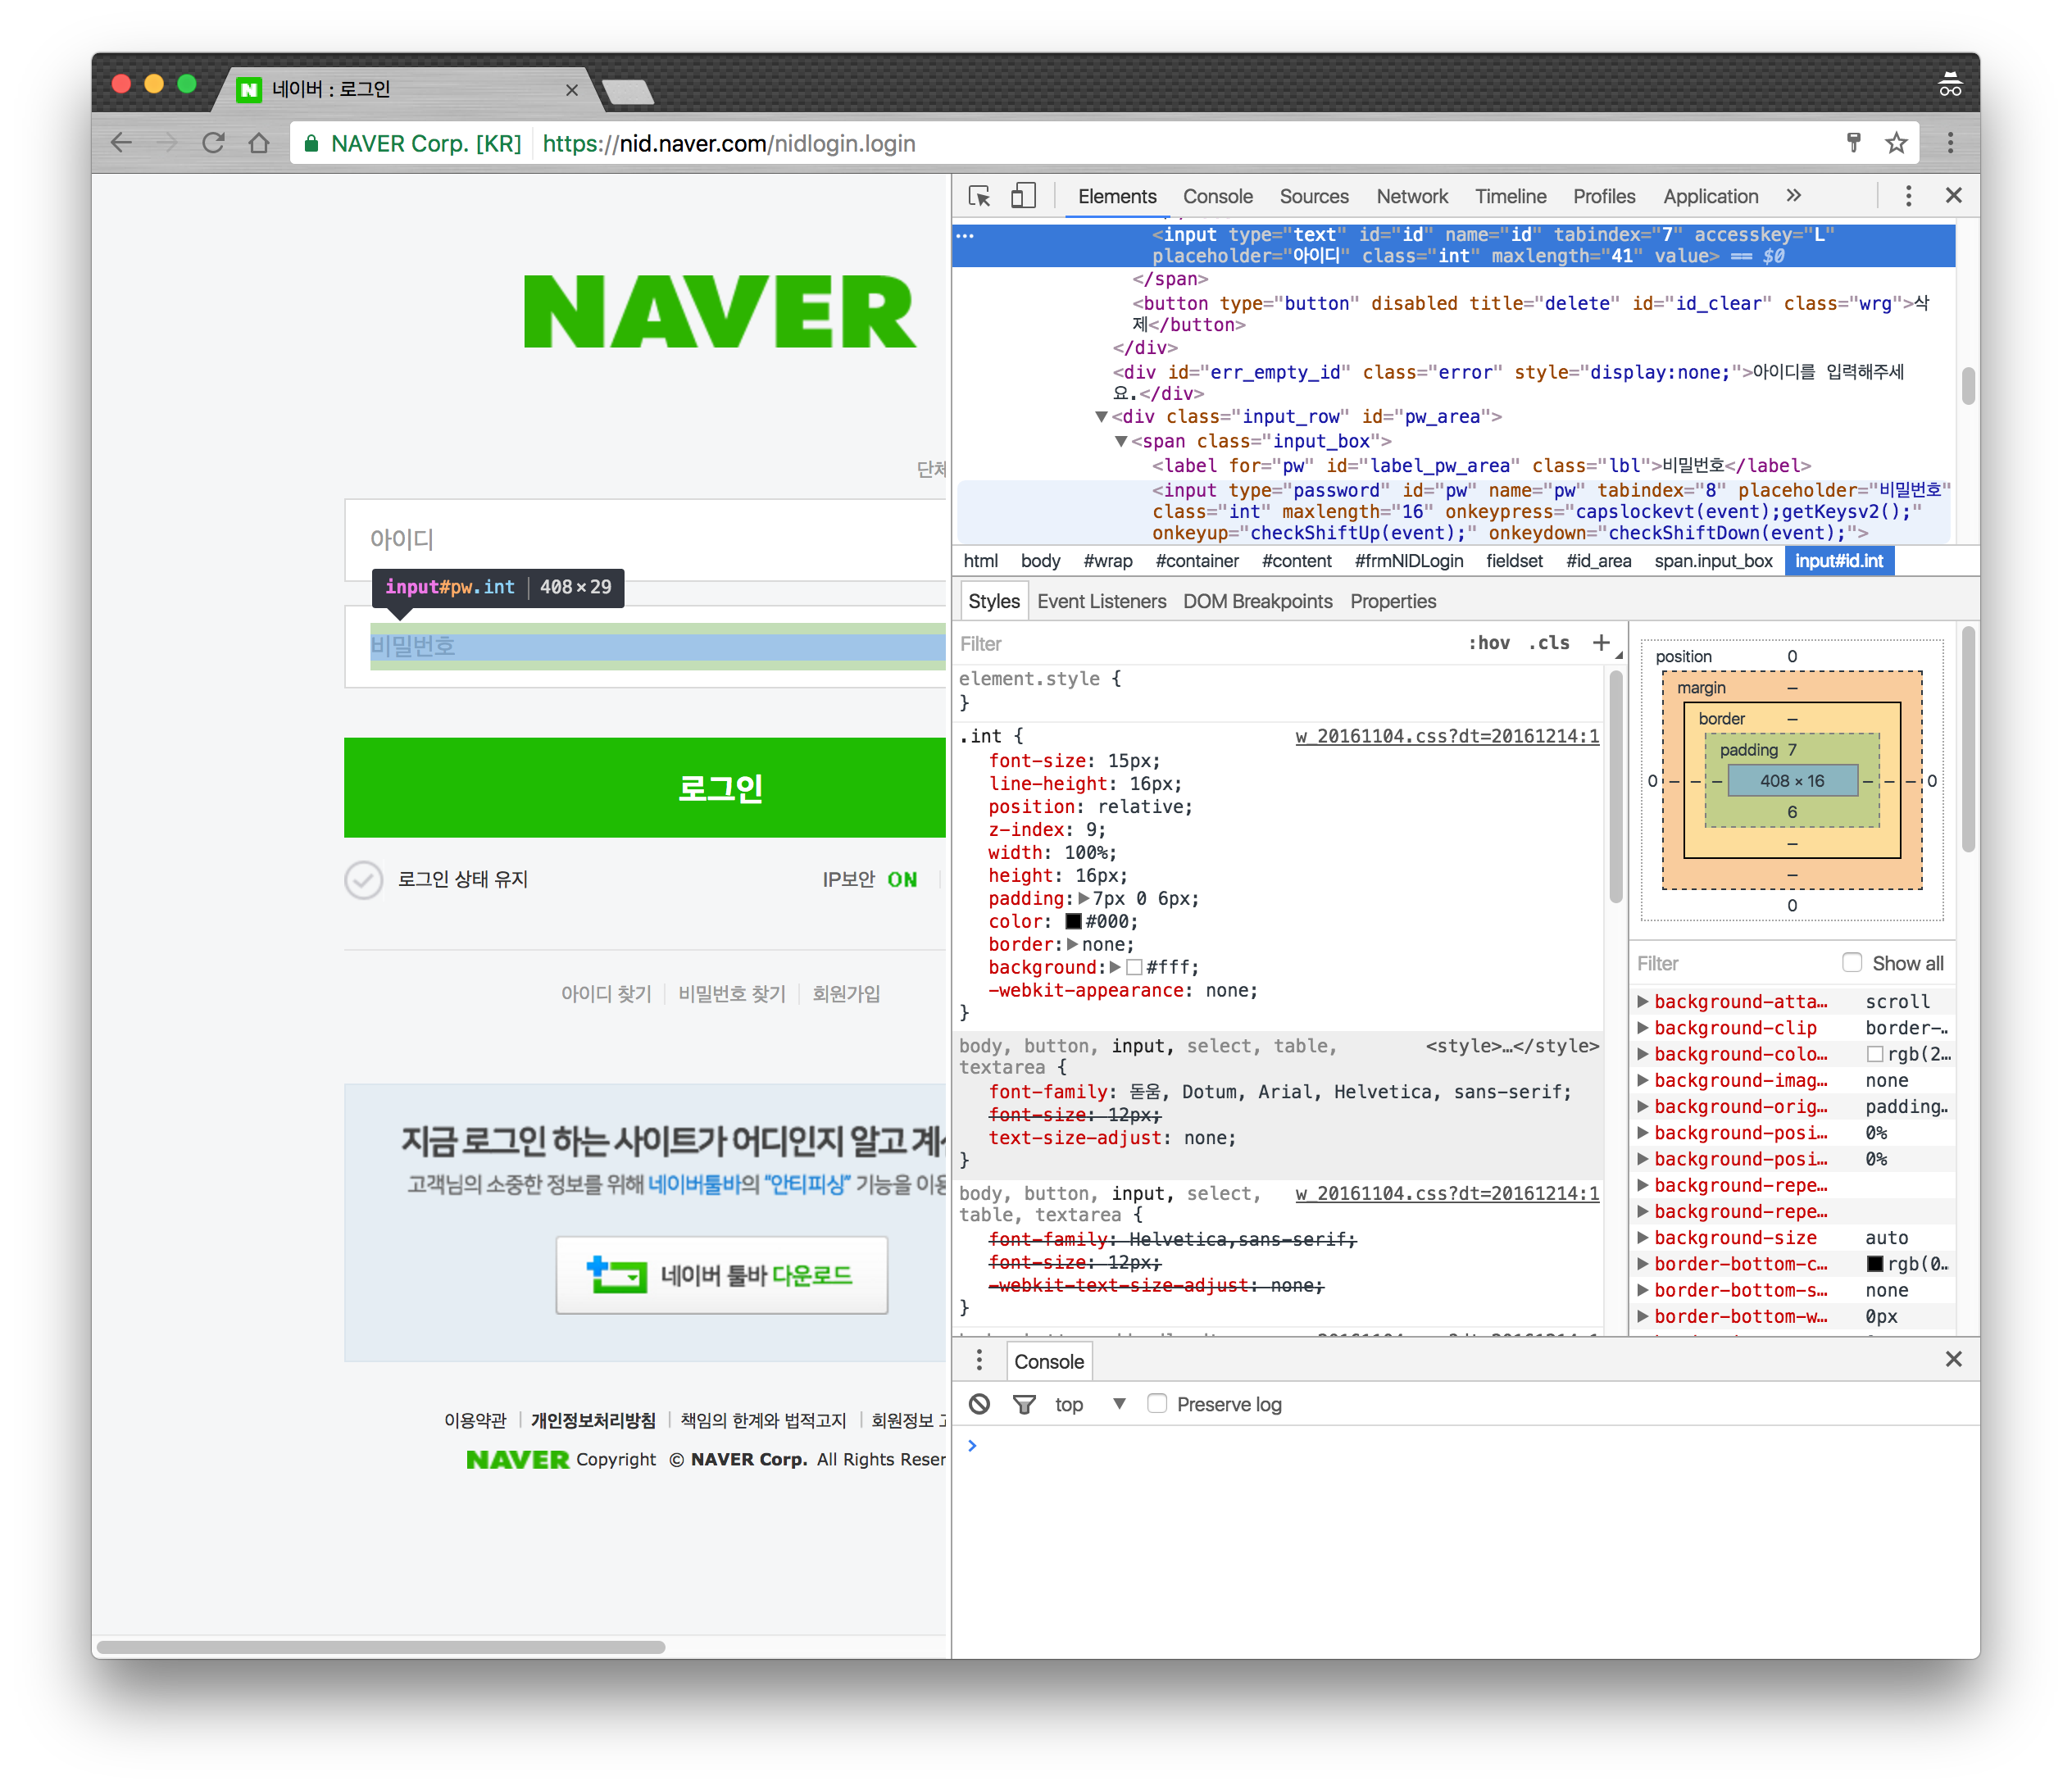
find_element_by_name을 통해 아이디/비밀번호 input 태그를 잡아주고, 값을 입력해 보자.



In [21]:
from selenium import webdriver 

driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3)
## url에 접근한다. 
driver.get('https://nid.naver.com/nidlogin.login')

## 아이디/ 비밀번호를 입력해준다. 
driver.find_element_by_name('id').send_keys('neip313')
driver.find_element_by_name('pw').send_keys('2142826526')

성공적으로 값이 입력된 것을 확인할 수 있다.

이제 Login버튼을 눌러 실제로 로그인이 되는지 확인해 보자.

In [24]:
import time 
from selenium import webdriver 

driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3)
## url에 접근한다. 
driver.get('https://nid.naver.com/nidlogin.login')

## 아이디/ 비밀번호를 입력해준다. 
time.sleep(1)
driver.find_element_by_name('id').send_keys('neip313')
time.sleep(1)
driver.find_element_by_name('pw').send_keys('2142826526')

## 로그인 버튼을 눌러주자. 
time.sleep(1)
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/input').click()

~~성공적으로 로그인이 되는 것을 확인할 수 있다.~~  

<u> 네이버는 현재 자동입력이 막혀있다. <u>
    
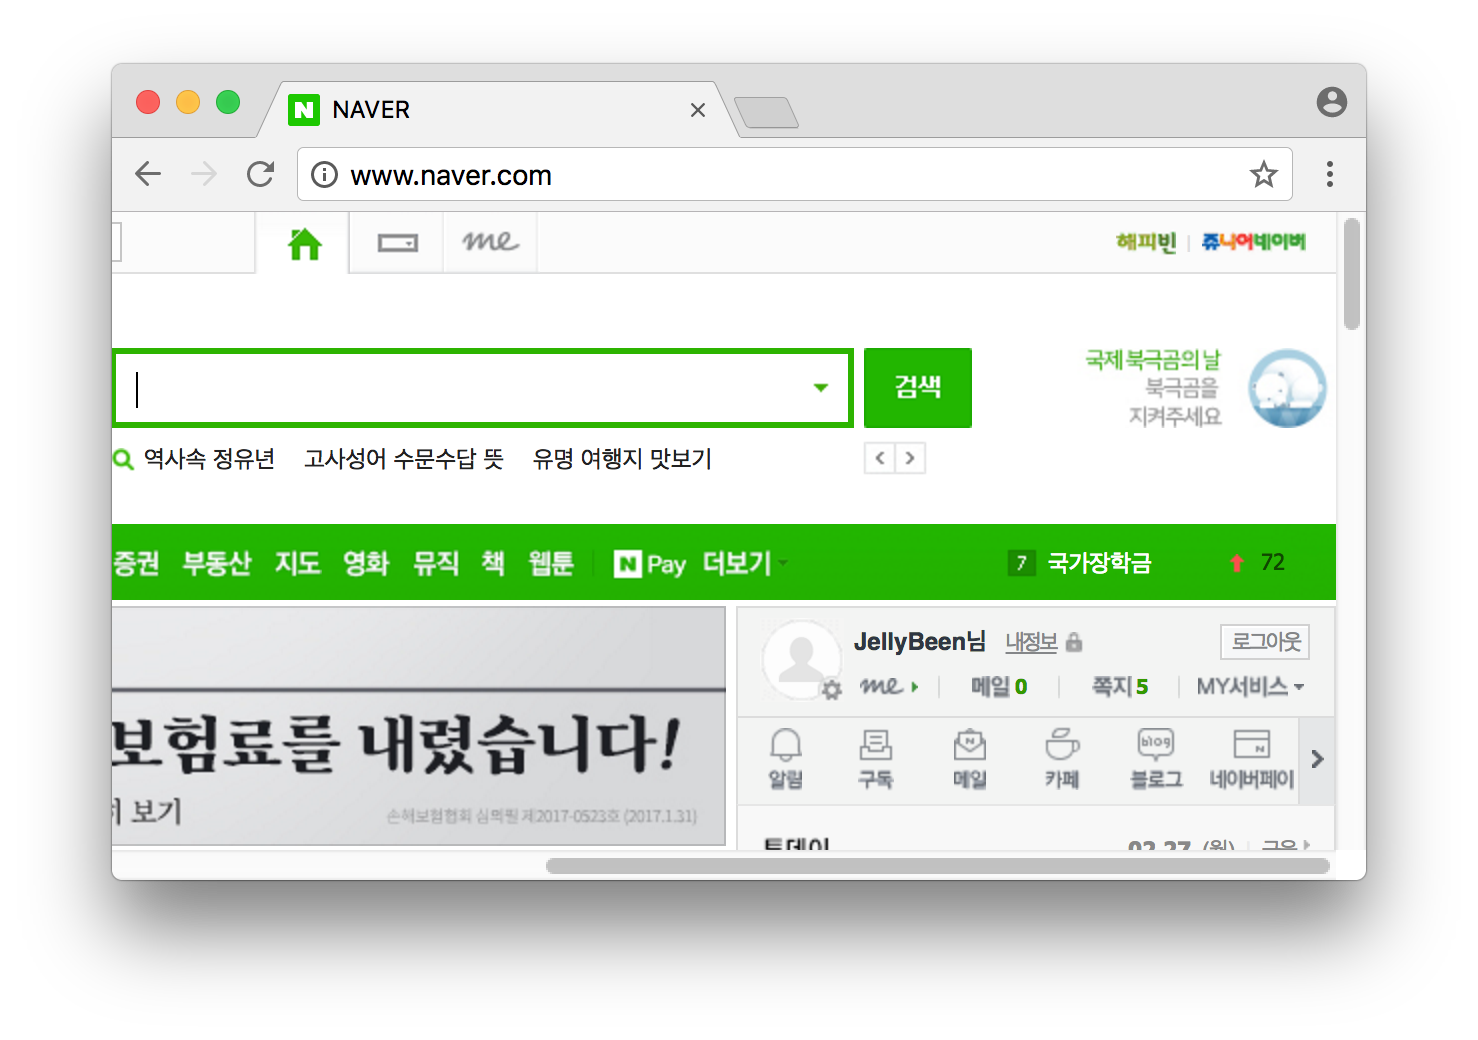  
    
로그인이 필요한 페이지인 네이버 페이의 주문내역 페이지를 가져와보자.



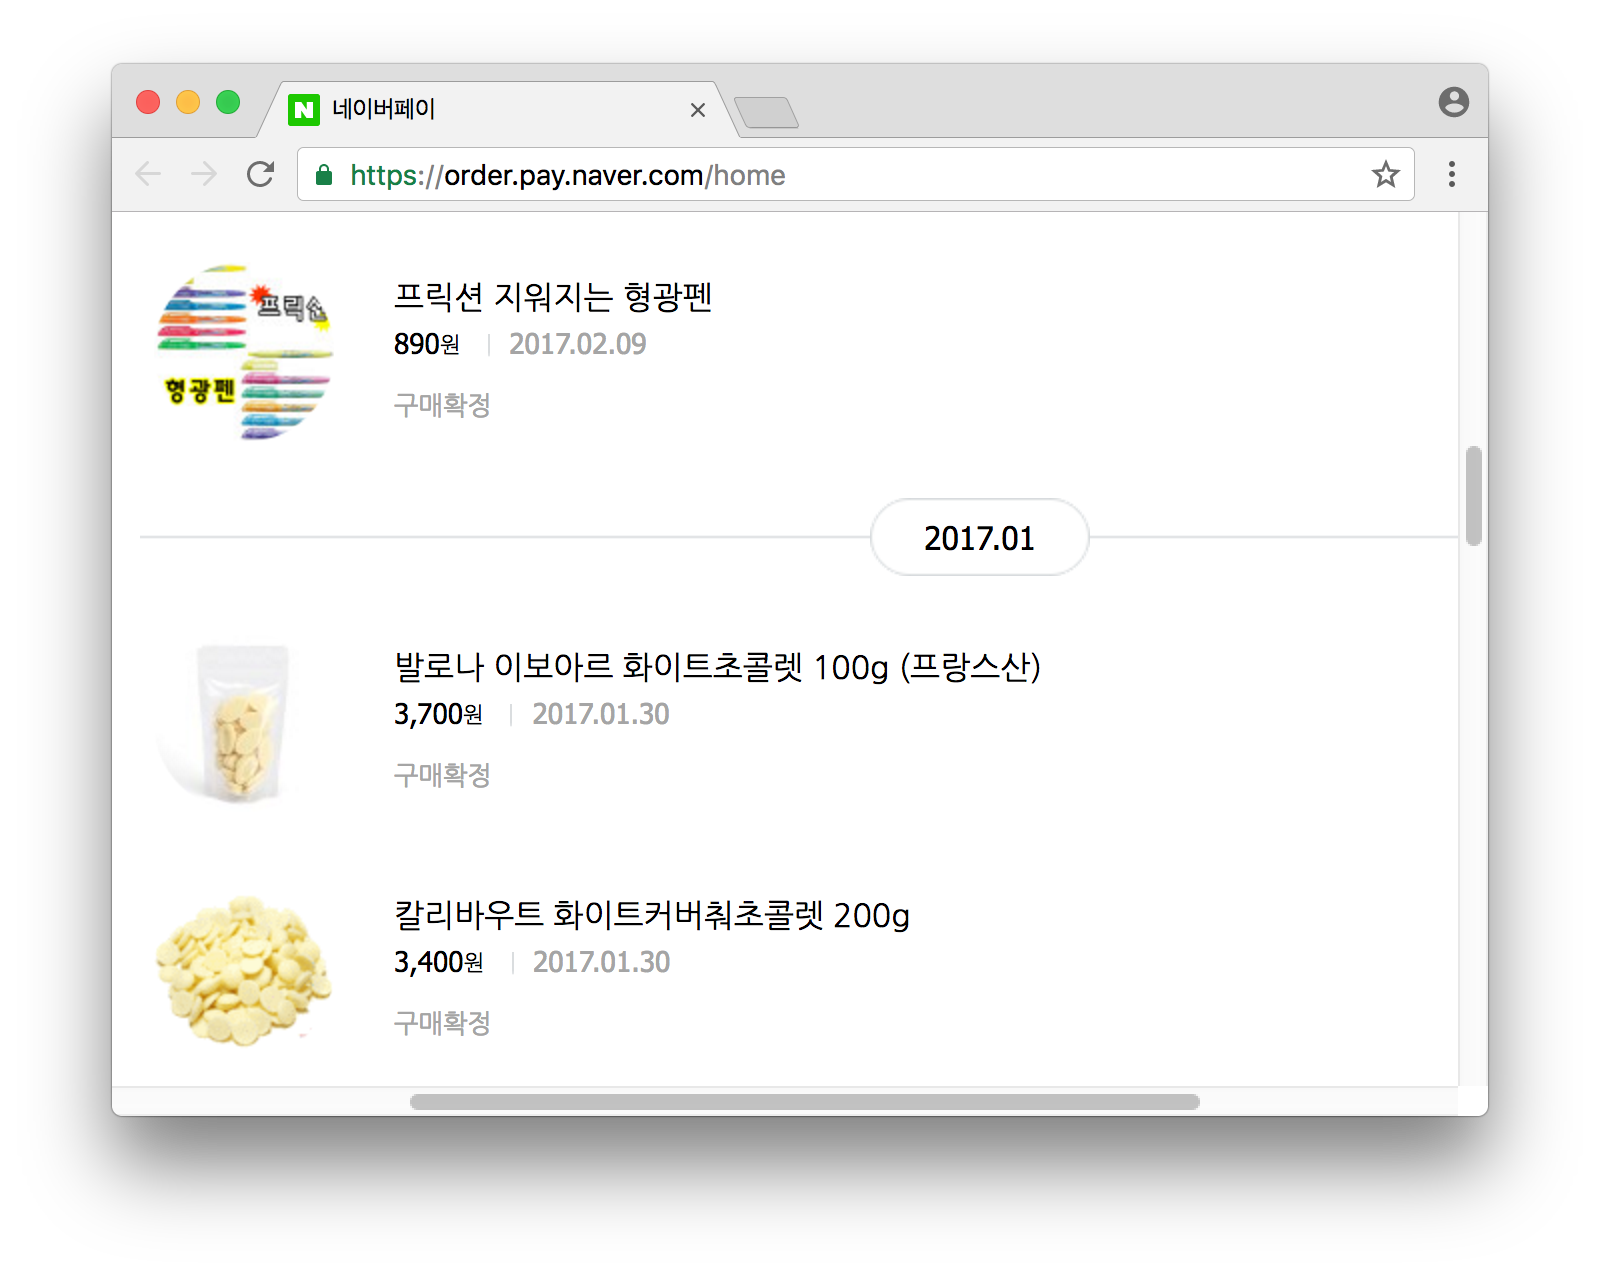
네이버 페이의 Url은 https://order.pay.naver.com/home 이다. 위 페이지의 알림 텍스트를 가져와 보자.



In [26]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3)
driver.get('https://nid.naver.com/nidlogin.login')
driver.find_element_by_name('id').send_keys('neip313')
driver.find_element_by_name('pw').send_keys('2142826526')
driver.find_element_by_xpath('//*[@id="frmNIDLogin"]/fieldset/input').click()

# Naver 페이 들어가기
driver.get('https://order.pay.naver.com/home')
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
notices = soup.select('div.p_inr > div.p_info > a > span')

for n in notices:
    print(n.text.strip())

로그인이 잘 되고, 성공적으로 리스트를 받아오는 것을 확인해 볼 수 있다.

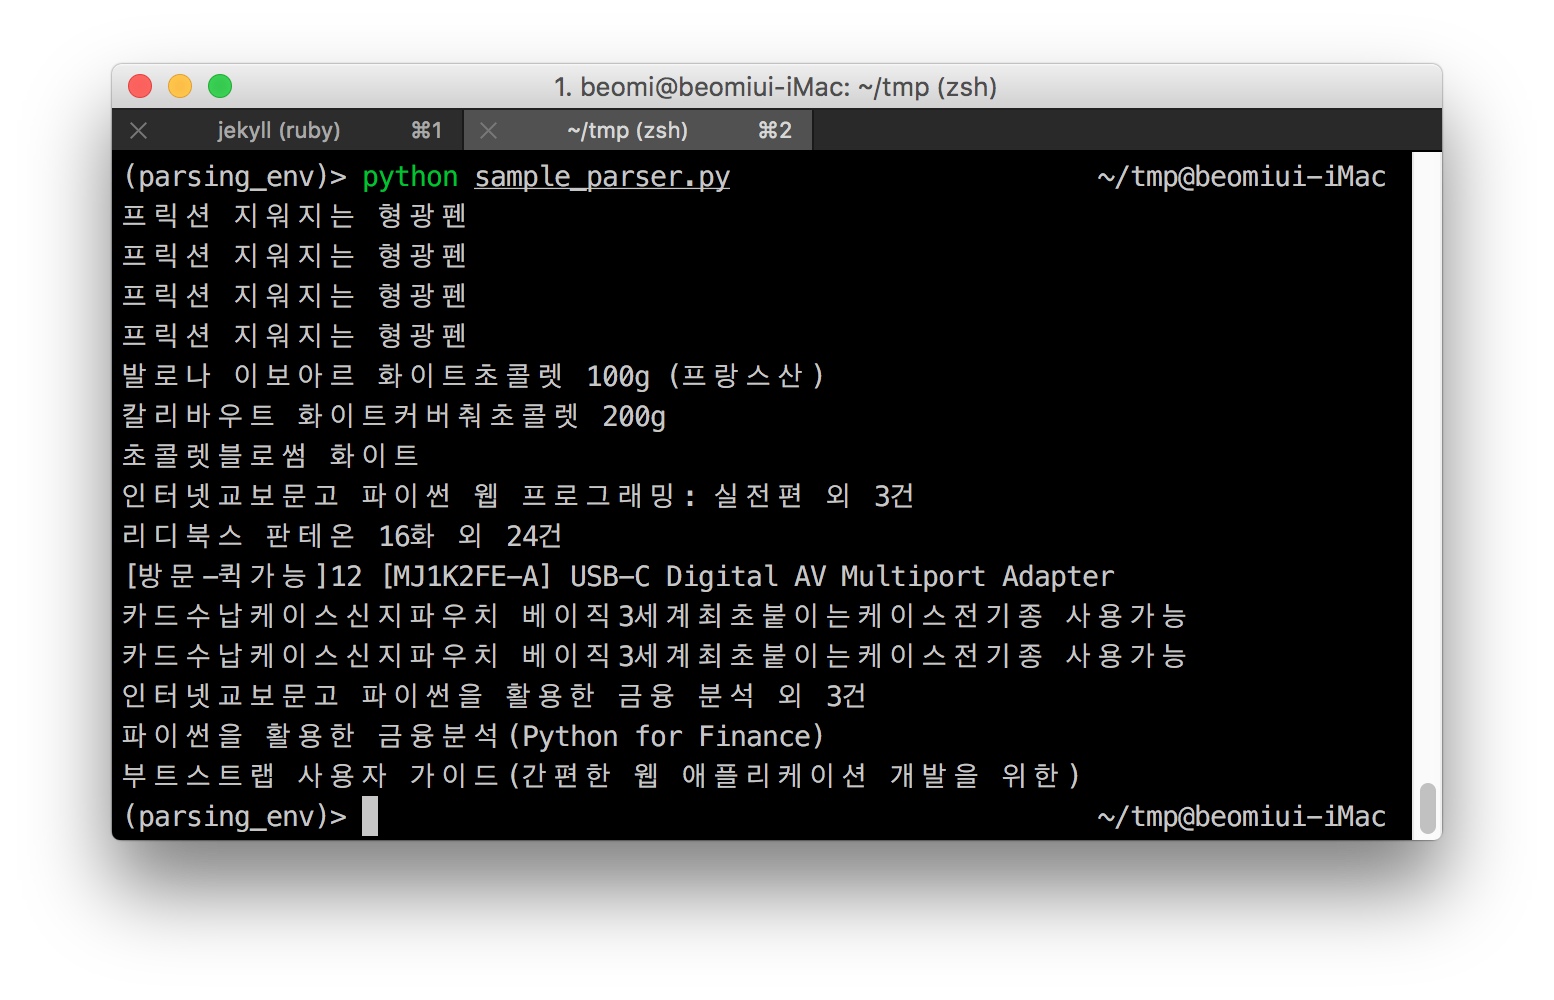

## 정리하기
Selenium은 웹 테스트 자동화 도구이지만, 멋진 크롤링 도구로 사용할 수 있다.

또한, BeautifulSoup와 함께 사용도 가능하기 때문에 크롤링을 하는데 제약도 줄어 훨씬 쉽게 크롤링을 할 수 있다.

In [27]:
from selenium import webdriver
from bs4 import BeautifulSoup

## setup Driver|Chrome : 크롬드라이버를 사용하는 driver 생성
driver = webdriver.Chrome('/Users/82106/Downloads/chromedriver_win32/chromedriver')
driver.implicitly_wait(3) ## 암묵적으로 웹 자원을 (최대) 3초 기다리기
## Login
driver.get('https://nid.naver.com/nidlogin.login') ## 네이버 로그인 URL로 이동하기
driver.find_element_by_name('id').send_keys('neip313') ## 값 입력
driver.find_element_by_name('pw').send_keys('2142826526')
driver.find_element_by_xpath(
    '//*[@id="frmNIDLogin"]/fieldset/input'
    ).click() ## 버튼클릭하기
driver.get('https://order.pay.naver.com/home') ## Naver 페이 들어가기
html = driver.page_source ## 페이지의 elements모두 가져오기
soup = BeautifulSoup(html, 'html.parser') ## BeautifulSoup사용하기
notices = soup.select('div.p_inr > div.p_info > a > span')

for n in notices:
    print(n.text.strip())

## 다음 가이드
Selenium으로 많은 사이트에서 여러 정보를 가져와 볼 수 있게 되었습니다.

하지만 가져온 데이터를 DB에 저장하려면 약간의 어려움이 따르게 됩니다.

다음 시간에는 Django의 ORM을 이용해 sqlite3 DB에 데이터를 저장해보는 방법에 대해 알아봅니다.